In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r"/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.drop(columns='customer_id', inplace=True)
df.head(3)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


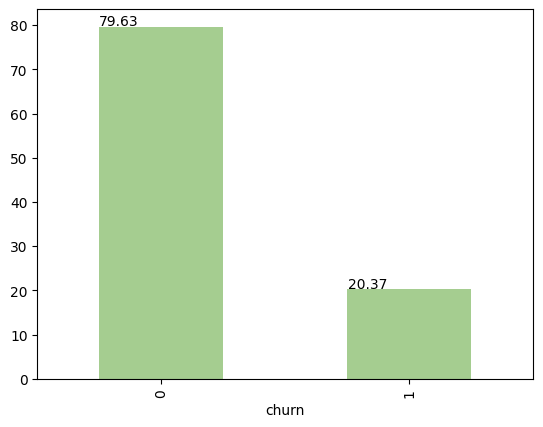

In [7]:
import matplotlib.pyplot as plt

percent_churn = (df.groupby(by='churn').count()['age'] / df.shape[0]) *100
percent_churn

ax = percent_churn.plot(kind='bar', cmap='crest')

# Adding labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


In [8]:
'''the model might think that the categories have an order (0 < 1 < 2, etc.), which is not usually the case for categories. 
For example, in your case, the ‘country_encoded’ and ‘gender_encoded’ columns don’t have a meaningful order.

One way to overcome this issue is to use one-hot encoding instead of label encoding for nominal data. 
One-hot encoding creates a binary column for each category and returns a matrix with the columns corresponding to the 
presence of the data in the original data.

However, XGBoost (the model you’re planning to use) is capable of handling label encoded categorical features, 
so you might not need to use one-hot encoding in this case. But it’s always a good idea to experiment with different 
encoding methods to see which one works best for your specific use case.
'''
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['country_encoded'] = label_encoder.fit_transform(df['country'])
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df.drop(columns=['country', 'gender'], inplace=True)

credit_score           Axes(0.125,0.11;0.0596154x0.77)
age                 Axes(0.196538,0.11;0.0596154x0.77)
tenure              Axes(0.268077,0.11;0.0596154x0.77)
balance             Axes(0.339615,0.11;0.0596154x0.77)
products_number     Axes(0.411154,0.11;0.0596154x0.77)
credit_card         Axes(0.482692,0.11;0.0596154x0.77)
active_member       Axes(0.554231,0.11;0.0596154x0.77)
estimated_salary    Axes(0.625769,0.11;0.0596154x0.77)
churn               Axes(0.697308,0.11;0.0596154x0.77)
country_encoded     Axes(0.768846,0.11;0.0596154x0.77)
gender_encoded      Axes(0.840385,0.11;0.0596154x0.77)
dtype: object

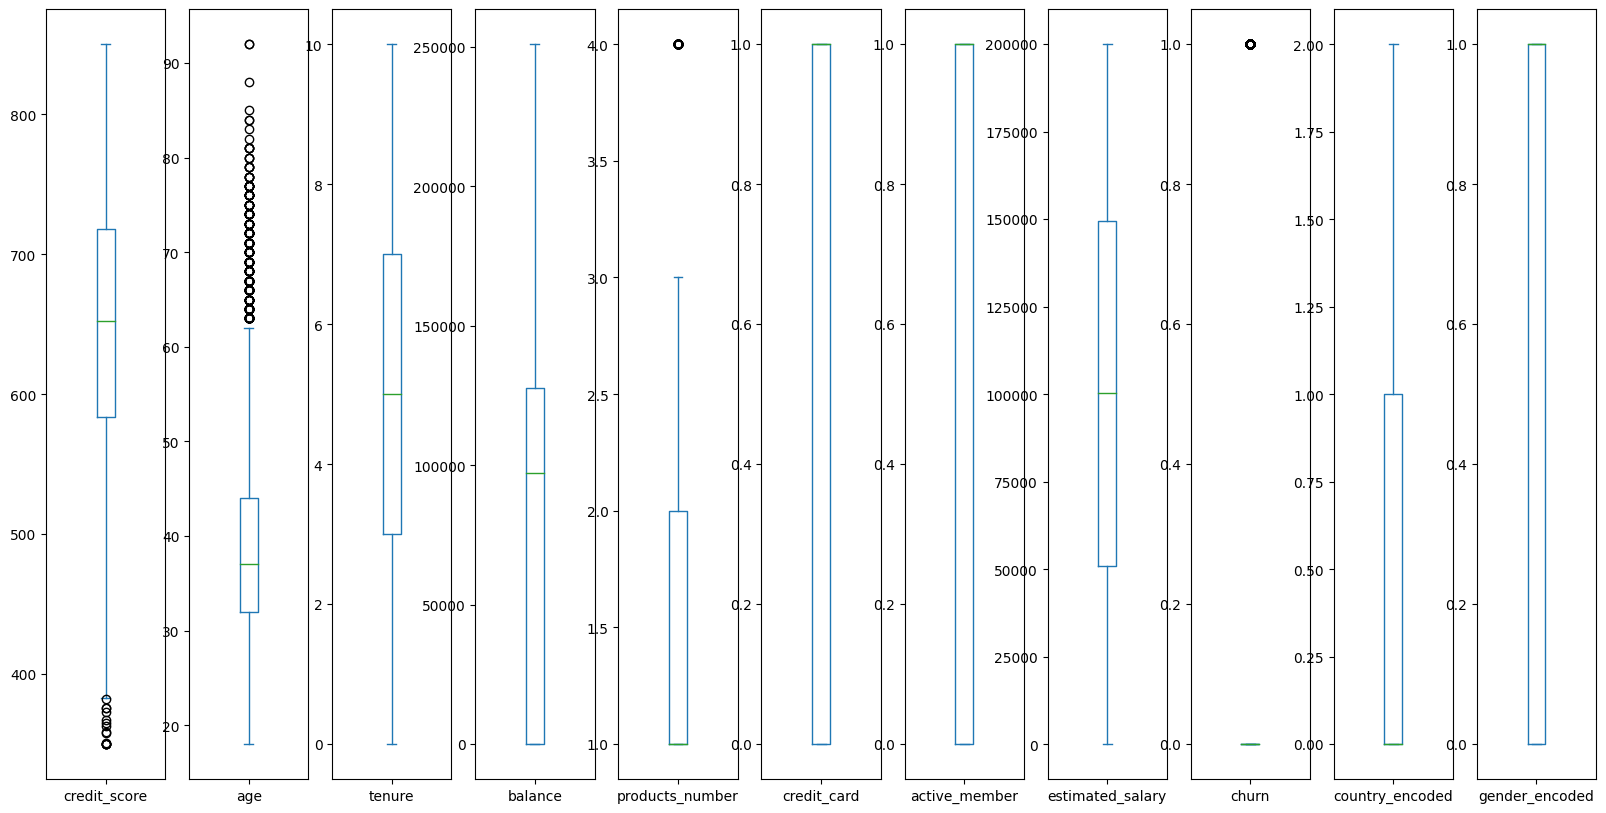

In [9]:
df.plot(kind='box', sharey=False, subplots=True, figsize=(20,10))

In [10]:
'''Winsorization on age and credit_score maybe?'''
'''Maybe xgboost will take care of it for us?'''

'Maybe xgboost will take care of it for us?'

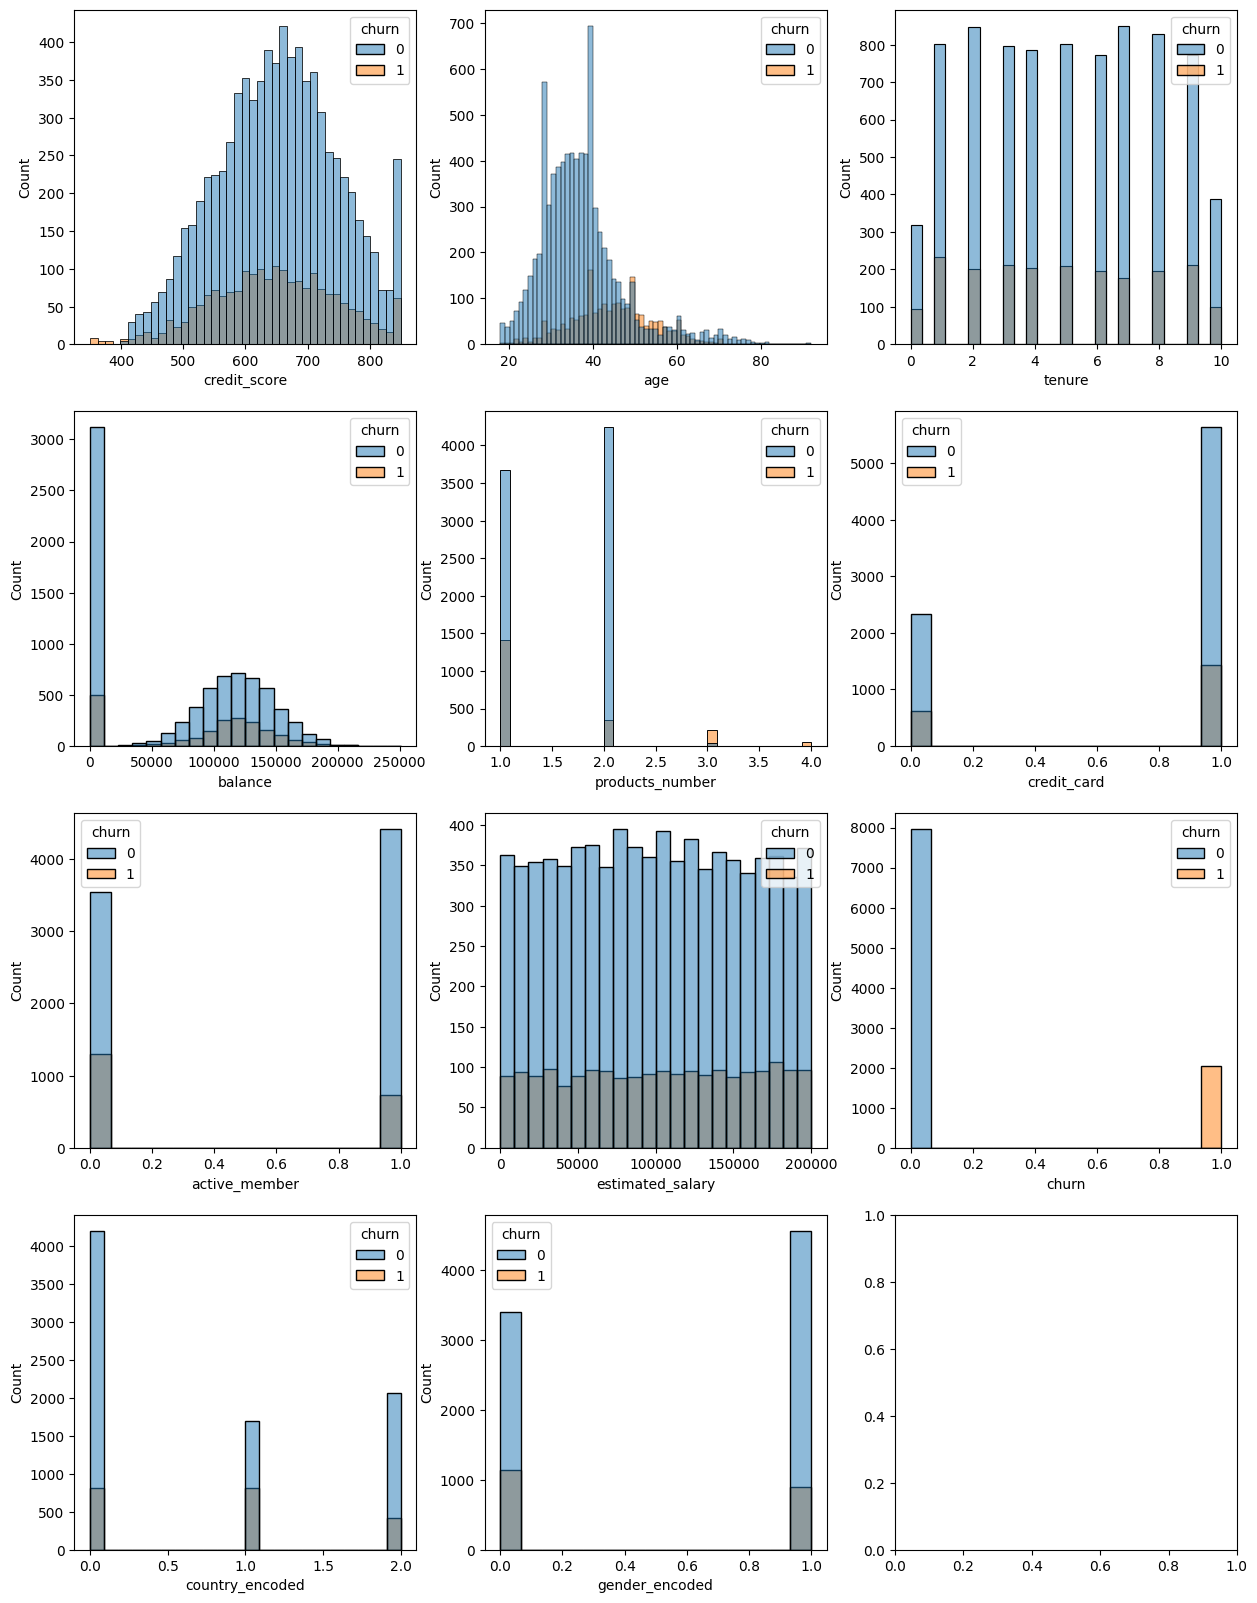

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)):
    sns.histplot(data=df, x=df.columns[i], hue="churn",ax=axs[i])

In [12]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_encoded,gender_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.746300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.827529,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000,1.000000


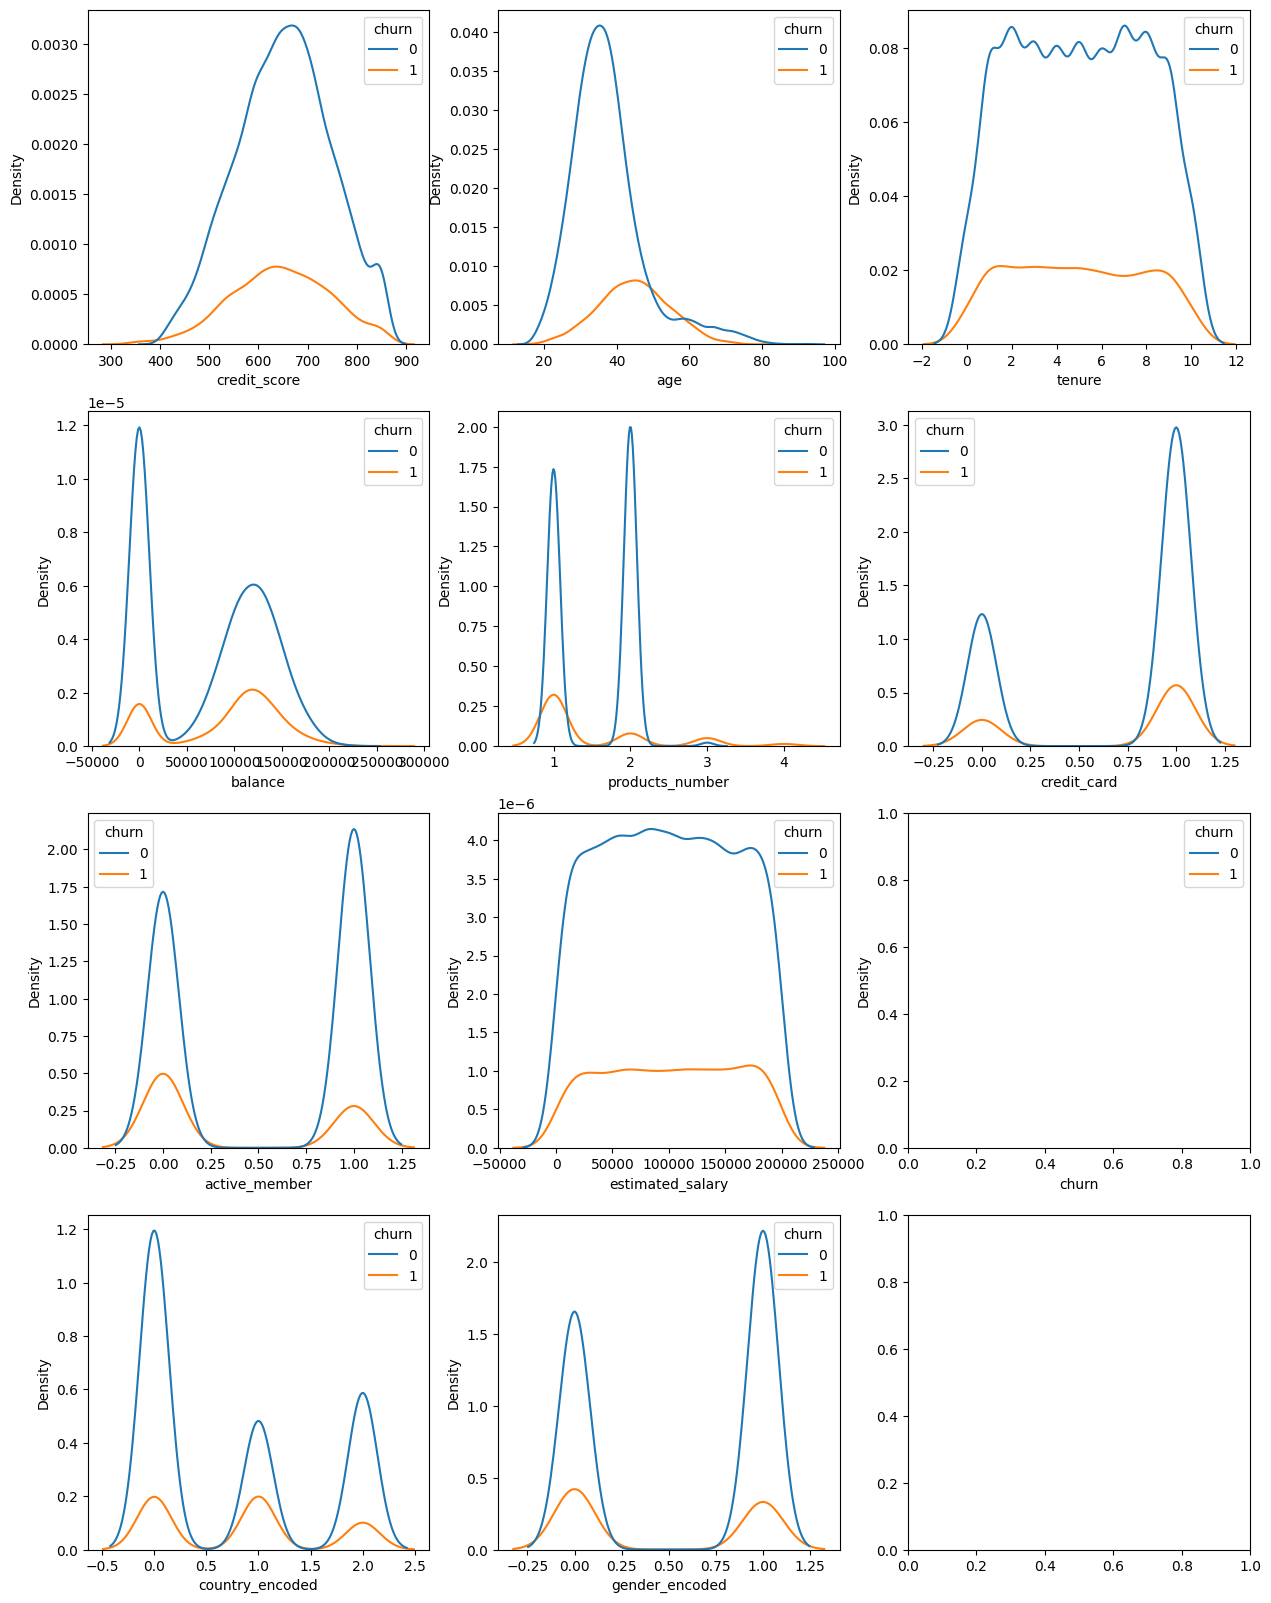

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)):
    sns.kdeplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

In [14]:
# df['age_log'] = df['age'].apply(lambda x: np.log(x))   # did not see any improvement

### xgboost requires, output variables be numeric(do label encoding if not), input variables not be categorical(do one hot encoding or label encoding, xgboost can take label encoded input no problemo)

In [15]:
df.head(3)

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_encoded,gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0


##### Standardization: This technique might be suitable for columns where the data appears to be normally distributed. This is often the case when the mean and median (50th percentile) are close to each other. From our data, the columns that might be suitable for standardization are age, tenure, balance, estimated_salary.
##### Normalization: This technique might be suitable for columns where the data is not normally distributed or the range of values is very wide. From our data, the columns that might be suitable for normalization are credit_score, products_number, credit_card, active_member, churn, country_encoded, gender_encoded.

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define columns to standardize and normalize
standardize_columns = ['age', 'tenure', 'balance', 'estimated_salary']
normalize_columns = ['credit_score', 'products_number', 'credit_card', 'active_member', 'country_encoded', 'gender_encoded']

# Standardize and normalize data
scaler = StandardScaler() # [u=0, std=1]
df[standardize_columns] = scaler.fit_transform(df[standardize_columns])

scaler = MinMaxScaler() # between [0, 1]
df[normalize_columns] = scaler.fit_transform(df[normalize_columns])

In [17]:
y = df['churn']
X = df.drop(columns='churn', axis=1,)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from xgboost import XGBClassifier

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.861
Precision: 0.7031802120141343
Recall: 0.5063613231552163
F1 Score: 0.5887573964497042
ROC AUC Score: 0.727045005074808


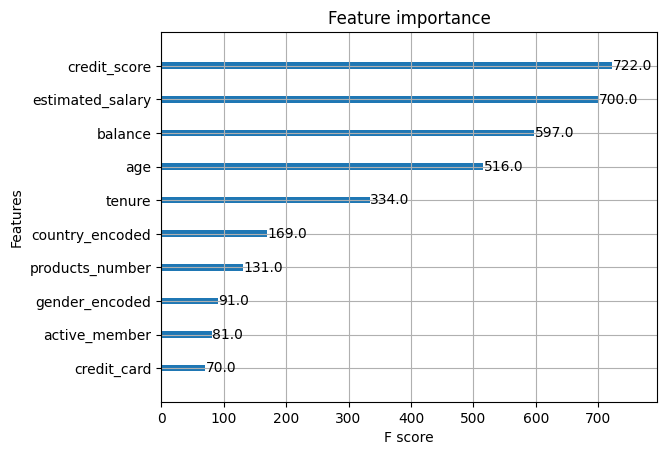

In [21]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(model)
plt.show()

In [22]:
USE_F_SCORE = True   # got even worst score, knock yourself if u want to though
if USE_F_SCORE:
    df = df[['estimated_salary', 'credit_score', 'balance', 'age', 'tenure', 'churn', 'country_encoded']]
    
y = df['churn']
X = df.drop(columns='churn', axis=1,)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from xgboost import XGBClassifier

# Train XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test)
# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.8135
Precision: 0.5409836065573771
Recall: 0.33587786259541985
F1 Score: 0.41444270015698587
ROC AUC Score: 0.6330913892939763


In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Assuming X_train and y_train are your features and labels
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters for XGBoost: ", best_params)


Best parameters for XGBoost:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [24]:
from xgboost import XGBClassifier

# Assuming best_params is the dictionary of best parameters obtained from GridSearchCV
xgb_best = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_best.fit(X_train, y_train)

# Now your model is trained with the best parameters
print("Model trained with the best parameters!")


y_pred = xgb_best.predict(X_test)
# Evaluate model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred)}')

Model trained with the best parameters!
Accuracy: 0.824
Precision: 0.615819209039548
Recall: 0.27735368956743
F1 Score: 0.3824561403508772
ROC AUC Score: 0.6175194085671624


In [25]:
model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}